In [36]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import sqlite3
from rubin_scheduler.utils import angular_separation, _ra_dec2_hpid


In [22]:
con = sqlite3.connect('initial_v3.4_10yrs.db')
data = pd.read_sql('select altitude,azimuth, fieldRA, fieldDec,observationStartMJD,rotTelPos, slewtime, slewDistance,observationId, night, filter, note, cummTelAz from observations ;', con)

con.close()

Text(0, 0.5, 'Cumulative Fraction of Slews')

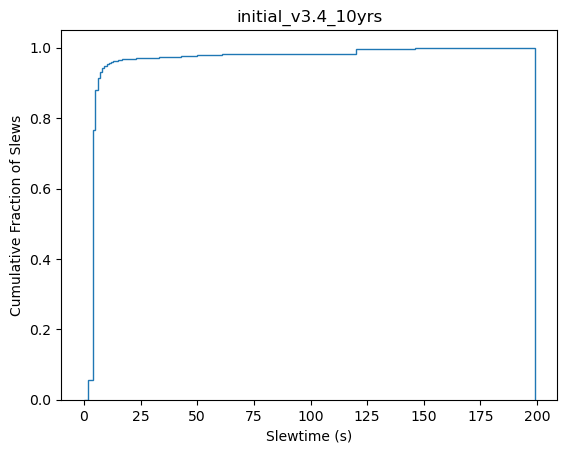

In [17]:
bins = np.arange(0,200)

plt.hist(data['slewTime'], bins=bins, cumulative=True, density=True, histtype="step")
plt.title('initial_v3.4_10yrs')
plt.xlabel('Slewtime (s)')
plt.ylabel('Cumulative Fraction of Slews')

(0.0, 20.0)

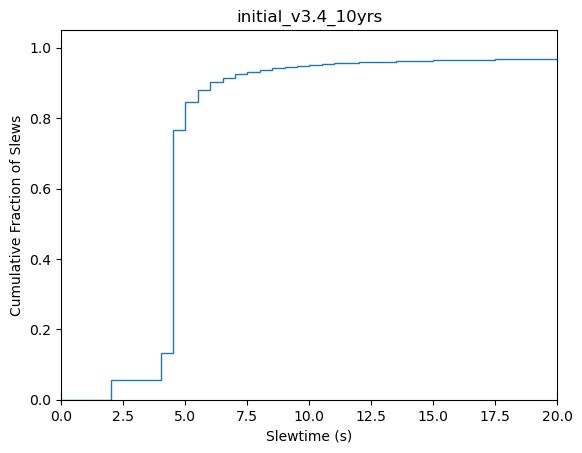

In [18]:
bins = np.arange(0,200, 0.5)

plt.hist(data['slewTime'], bins=bins, cumulative=True, density=True, histtype="step")
plt.title('initial_v3.4_10yrs')
plt.xlabel('Slewtime (s)')
plt.ylabel('Cumulative Fraction of Slews')
plt.xlim([0,20])

Text(0, 0.5, 'Cumulative Fraction of Slews')

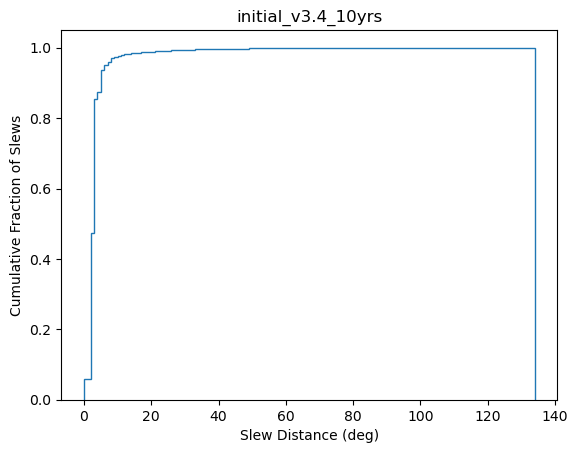

In [27]:
bins = np.arange(0,135)

plt.hist(data['slewDistance'], bins=bins, cumulative=True, density=True, histtype="step")
plt.title('initial_v3.4_10yrs')
plt.xlabel('Slew Distance (deg)')
plt.ylabel('Cumulative Fraction of Slews')

(0.0, 25.0)

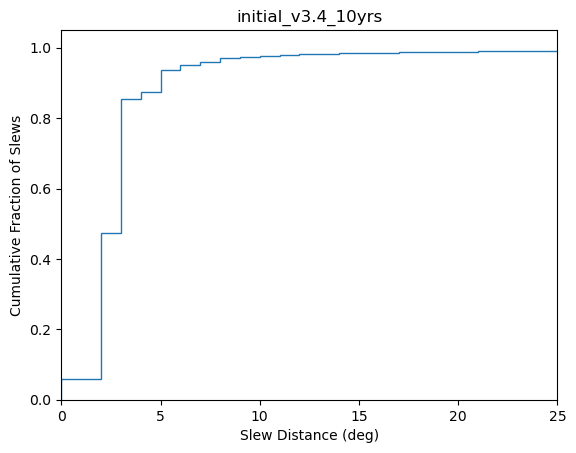

In [28]:
bins = np.arange(0,135)

plt.hist(data['slewDistance'], bins=bins, cumulative=True, density=True, histtype="step")
plt.title('initial_v3.4_10yrs')
plt.xlabel('Slew Distance (deg)')
plt.ylabel('Cumulative Fraction of Slews')
plt.xlim([0,25])

Text(0.5, 1.0, 'initial_v3.4_10yrs')

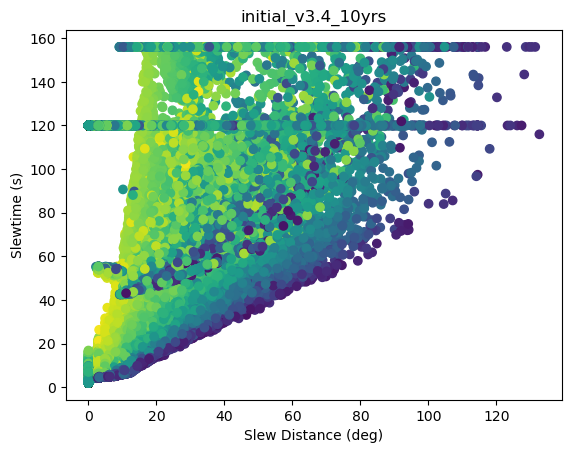

In [32]:


plt.scatter(data['slewDistance'], data['slewTime'], c=data["altitude"])
plt.xlabel('Slew Distance (deg)')
plt.ylabel('Slewtime (s)')
plt.title('initial_v3.4_10yrs')


In [33]:
nd = data['night'][1:] - data['night'].values[0:-1]

same_filt = data['filter'].values[0:-1] == data['filter'].values[1:]

rtp_diff = data['rotTelPos'].values[1:] - data['rotTelPos'].values[0:-1]

In [37]:
angs = angular_separation(data['azimuth'][1:].values,
                          data['altitude'][1:].values, 
                          data['azimuth'][0:-1].values, data['altitude'][0:-1].values)

In [41]:
dalt = data['altitude'][1:] - data['altitude'].values[0:-1]
daz = data['azimuth'][1:] - data['azimuth'].values[0:-1]

lssd = np.where((nd == 0) & (same_filt == True) )[0]

Text(0.5, 1.0, 'initial_v3.4_10yrs')

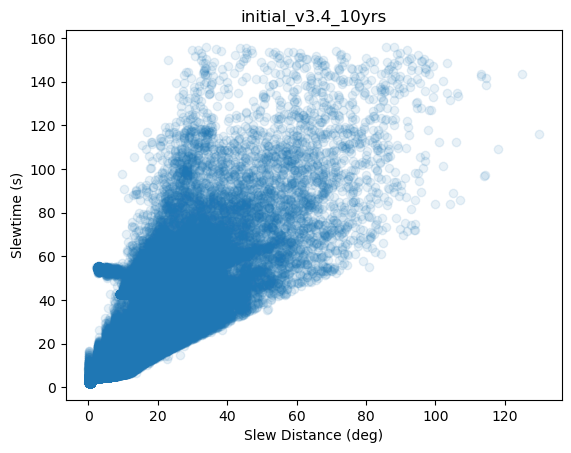

In [49]:
plt.scatter(angs[lssd], data['slewTime'].values[1:][lssd], alpha=0.1)
plt.xlabel('Slew Distance (deg)')
plt.ylabel('Slewtime (s)')
plt.title('initial_v3.4_10yrs')


Text(0.5, 1.0, 'initial_v3.4_10yrs, d_az > d_alt')

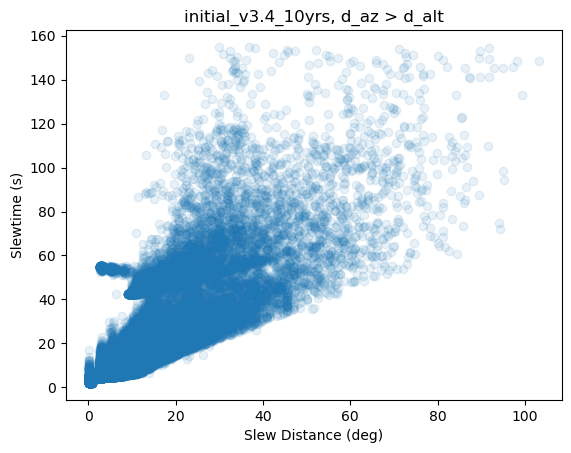

In [51]:
lssd = np.where((nd == 0) & (same_filt == True) & (daz > dalt))[0]
plt.scatter(angs[lssd], data['slewTime'].values[1:][lssd], alpha=0.1)
plt.xlabel('Slew Distance (deg)')
plt.ylabel('Slewtime (s)')
plt.title('initial_v3.4_10yrs, d_az > d_alt')


Text(0.5, 1.0, 'initial_v3.4_10yrs, d_az < d_alt')

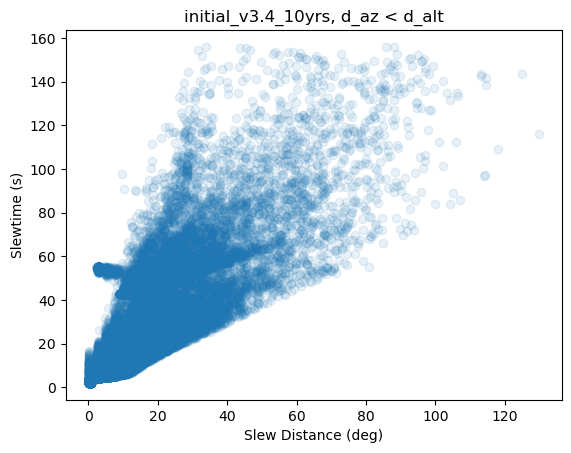

In [52]:
lssd = np.where((nd == 0) & (same_filt == True) & (daz < dalt))[0]
plt.scatter(angs[lssd], data['slewTime'].values[1:][lssd], alpha=0.1)
plt.xlabel('Slew Distance (deg)')
plt.ylabel('Slewtime (s)')
plt.title('initial_v3.4_10yrs, d_az < d_alt')


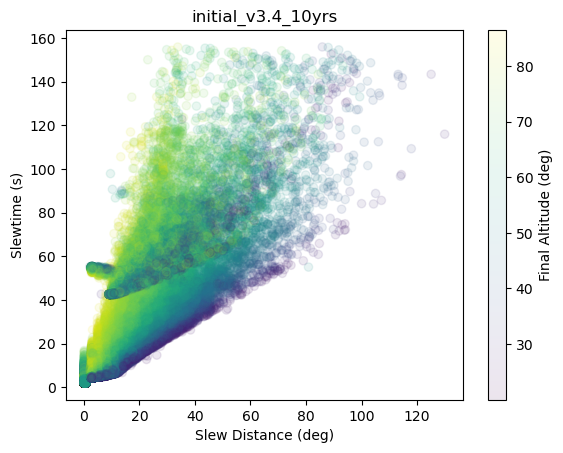

In [56]:
lssd = np.where((nd == 0) & (same_filt == True))[0]
plt.scatter(angs[lssd], data['slewTime'].values[1:][lssd], c=data["altitude"].values[1:][lssd], alpha=0.1)
plt.xlabel('Slew Distance (deg)')
plt.ylabel('Slewtime (s)')
plt.title('initial_v3.4_10yrs')
cb = plt.colorbar()
cb.set_label("Final Altitude (deg)")